## Modelo de Regresión Logistica Autocura

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
dataframe = pd.read_csv(r"Desktop/Base_entrenamiento.csv")
dataframe.head()

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,7,7,2.857738,3.5,7,7.0,1.166667,7,0,2.333333,...,0.0,0,0,0,0.000000,0,2,1,1,201608
1,17,17,7.641989,12.0,17,17.0,8.000000,17,0,13.666667,...,0.0,2,0,0,8.810053,0,5,1,1,201611
2,27,36,12.868566,13.5,27,27.0,21.000000,27,0,14.000000,...,0.0,7,0,0,10.500000,0,9,1,1,201705
3,27,27,10.888832,13.5,27,27.0,4.833333,27,0,9.000000,...,0.0,0,0,0,0.000000,0,12,1,1,201609
4,32,32,11.651895,10.0,20,20.0,20.833333,20,0,17.333333,...,0.0,19,0,0,9.190000,0,15,1,1,201702


In [3]:
dataframe.describe()

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.00000
mean,12.908100,16.447200,6.484026,7.653050,7.3156,7.3156,7.034238,10.878500,0.010300,7.507875,...,1634.203000,3.309350,0.03795,0.001600,6.729243,0.692400,20054.133900,1.0,1.0,201663.59140
std,19.558647,22.596153,8.130128,15.100529,15.7581,15.7581,13.312215,18.284183,0.387042,14.320475,...,18443.129269,5.683887,0.19108,0.159996,5.057818,0.461512,11678.100328,0.0,0.0,46.86751
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,1.0,1.0,201607.00000
25%,0.000000,3.000000,1.224745,0.000000,0.0000,0.0000,0.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9939.500000,1.0,1.0,201610.00000
50%,7.000000,11.000000,4.242641,3.000000,0.0000,0.0000,3.500000,5.000000,0.000000,3.333333,...,0.000000,1.000000,0.00000,0.000000,8.265756,1.000000,19889.500000,1.0,1.0,201702.00000
75%,17.000000,22.000000,8.981462,9.000000,9.0000,9.0000,8.666667,14.000000,0.000000,9.000000,...,0.000000,3.000000,0.00000,0.000000,10.518994,1.000000,30168.250000,1.0,1.0,201705.00000
max,696.000000,1062.000000,210.552052,681.500000,696.0000,696.0000,850.000000,696.000000,16.000000,667.333333,...,348900.000000,31.000000,1.00000,16.000000,30.000000,1.000000,40453.000000,1.0,1.0,201708.00000


In [4]:
print(dataframe.groupby('y_auto_cura').size())

y_auto_cura
0     6152
1    13848
dtype: int64


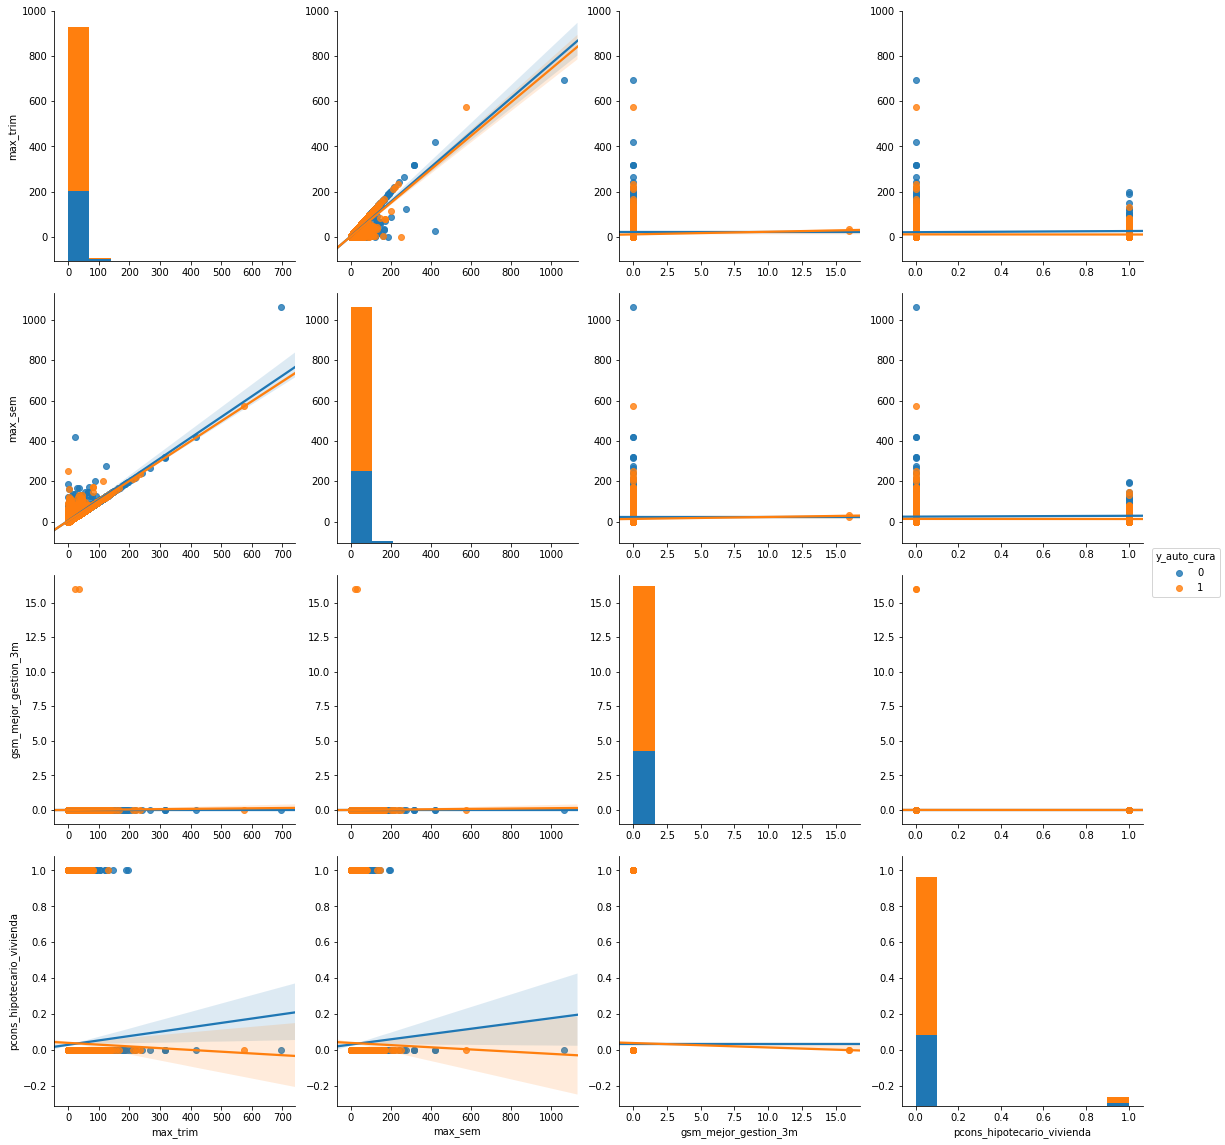

In [5]:
sb.pairplot(dataframe.dropna(), hue='y_auto_cura',size=4,vars=["max_trim", "max_sem","gsm_mejor_gestion_3m","pcons_hipotecario_vivienda"],kind='reg')

In [6]:
X = np.array(dataframe.drop(['y_auto_cura'],1))
y = np.array(dataframe['y_auto_cura'])
X.shape

(20000, 123)

In [7]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
predictions = model.predict(X)


In [10]:

model.score(X,y)

0.69189999999999996

In [42]:
validation_size = 0.2
seed = 9
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [43]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.690687 (0.011748)


In [44]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.69275


In [45]:
print(confusion_matrix(Y_validation, predictions))

[[   9 1213]
 [  16 2762]]


In [46]:
print(classification_report(Y_validation, predictions))

             precision    recall  f1-score   support

          0       0.36      0.01      0.01      1222
          1       0.69      0.99      0.82      2778

avg / total       0.59      0.69      0.57      4000



In [49]:
#X_new = pd.DataFrame({'max_trim': [10], 'max_sem': [3], 'desv_sem': [5], 'prom_bim': [9],'max_mes_anterior': [5],'prom_mes_anterior': [5],'prom_sem': [5],'max_bim': [5],'mejor_gestion': [5]
 #                    })
#model.predict(X_new)